In [25]:
import os
from PIL import Image
skybox_images = []
def analyze_background_distribution(folder_path):
    """
    Analyzes and classifies PNG files in a folder based on their corner pixels.

    Args:
        folder_path (str): The path to the folder containing the PNG files.
    """
    # --- Define our color categories in RGBA format ---
    # RGBA: (Red, Green, Blue, Alpha)
    # Alpha=0 is fully transparent, Alpha=255 is fully opaque.
    WHITE_OPAQUE = (255, 255, 255, 255)
    GRAY_OPAQUE = (64, 64, 64, 255) # #404040 is (64, 64, 64) in RGB

    # --- Initialize counters for each category ---
    category_counts = {
        "Transparent Background": [],
        "Monotonous White": [],
        "Monotonous Gray": [],
        "Non-Monotonous (Skybox)":[] 
    }
    total_png_analyzed = 0

    print(f"Analyzing PNG images in: {folder_path}\n")

    # Iterate through all files in the specified folder
    for entry in os.scandir(folder_path):
        if entry.is_file() and entry.name.lower().endswith('.png'):
            total_png_analyzed += 1
            try:
                with Image.open(entry.path) as img:
                    # Ensure image is in RGBA mode to handle all cases
                    if img.mode != 'RGBA':
                        img = img.convert('RGBA')

                    width, height = img.size
                    # Skip analysis for tiny images that don't have 4 distinct corners
                    if width < 2 or height < 2:
                        continue

                    # Get the RGBA values of the four corner pixels
                    corners = [
                        img.getpixel((0, 0)),
                        img.getpixel((width - 1, 0)),
                        img.getpixel((0, height - 1)),
                        img.getpixel((width - 1, height - 1))
                    ]

                    # --- Classification Logic ---
                    # 1. Check for Transparent Background
                    # All corners must have an alpha channel of 0
                    if all(pixel[3] == 0 for pixel in corners):
                        category_counts["Transparent Background"].append(entry.path)
                    
                    # 2. Check for Monotonous White
                    elif all(pixel == WHITE_OPAQUE for pixel in corners):
                        category_counts["Monotonous White"].append(entry.path)

                    # 3. Check for Monotonous Gray
                    elif all(all(60 <= channel <= 68 for channel in pixel[:3]) for pixel in corners):
                        category_counts["Monotonous Gray"].append(entry.path)
                    
                    # 4. If none of the above, it's Non-Monotonous
                    else:
                        category_counts["Non-Monotonous (Skybox)"].append(entry.path)

            except Exception as e:
                print(f"Could not process file {entry.name}: {e}")

    # --- Print the final summary ---
    print("\n--- Analysis Complete ---\n")
    print(f"Total PNG files analyzed: {total_png_analyzed}\n")
    
    print("--- Background Distribution ---")
    if total_png_analyzed > 0:
        for category, count in category_counts.items():
            percentage = (len(count) / total_png_analyzed) * 100
            print(f"{category}: {len(count)} files ({percentage:.2f}%)")
    else:
        print("No PNG files were found to analyze.")
    return category_counts

if __name__ == "__main__":
    # IMPORTANT: Replace this with the actual path to your folder
    your_folder_path = "data/test_data/gallery_image_for_mesh"

    if os.path.isdir(your_folder_path):
        categorys  = analyze_background_distribution(your_folder_path)
    else:
        print(f"Error: The folder '{your_folder_path}' does not exist. Please check the path.")

Analyzing PNG images in: data/test_data/gallery_image_for_mesh


--- Analysis Complete ---

Total PNG files analyzed: 2600

--- Background Distribution ---
Transparent Background: 1199 files (46.12%)
Monotonous White: 200 files (7.69%)
Monotonous Gray: 399 files (15.35%)
Non-Monotonous (Skybox): 802 files (30.85%)


In [ ]:

your_folder_path = "data/train_data/images"
# --- Analysis Complete ---

# Total PNG files analyzed: 13650

# --- Background Distribution ---
# Transparent Background: 6297 files (46.13%)
# Monotonous White: 1050 files (7.69%)
# Monotonous Gray: 2099 files (15.38%)
# Non-Monotonous (Skybox): 4204 files (30.80%)


your_folder_path = "data/test_data/gallery_image_for_mesh"
# --- Analysis Complete ---

# Total PNG files analyzed: 2600

# --- Background Distribution ---
# Transparent Background: 1199 files (46.12%)
# Monotonous White: 200 files (7.69%)
# Monotonous Gray: 399 files (15.35%)
# Non-Monotonous (Skybox): 802 files (30.85%)

Transparent Background
Found 60 images. Preparing to display...


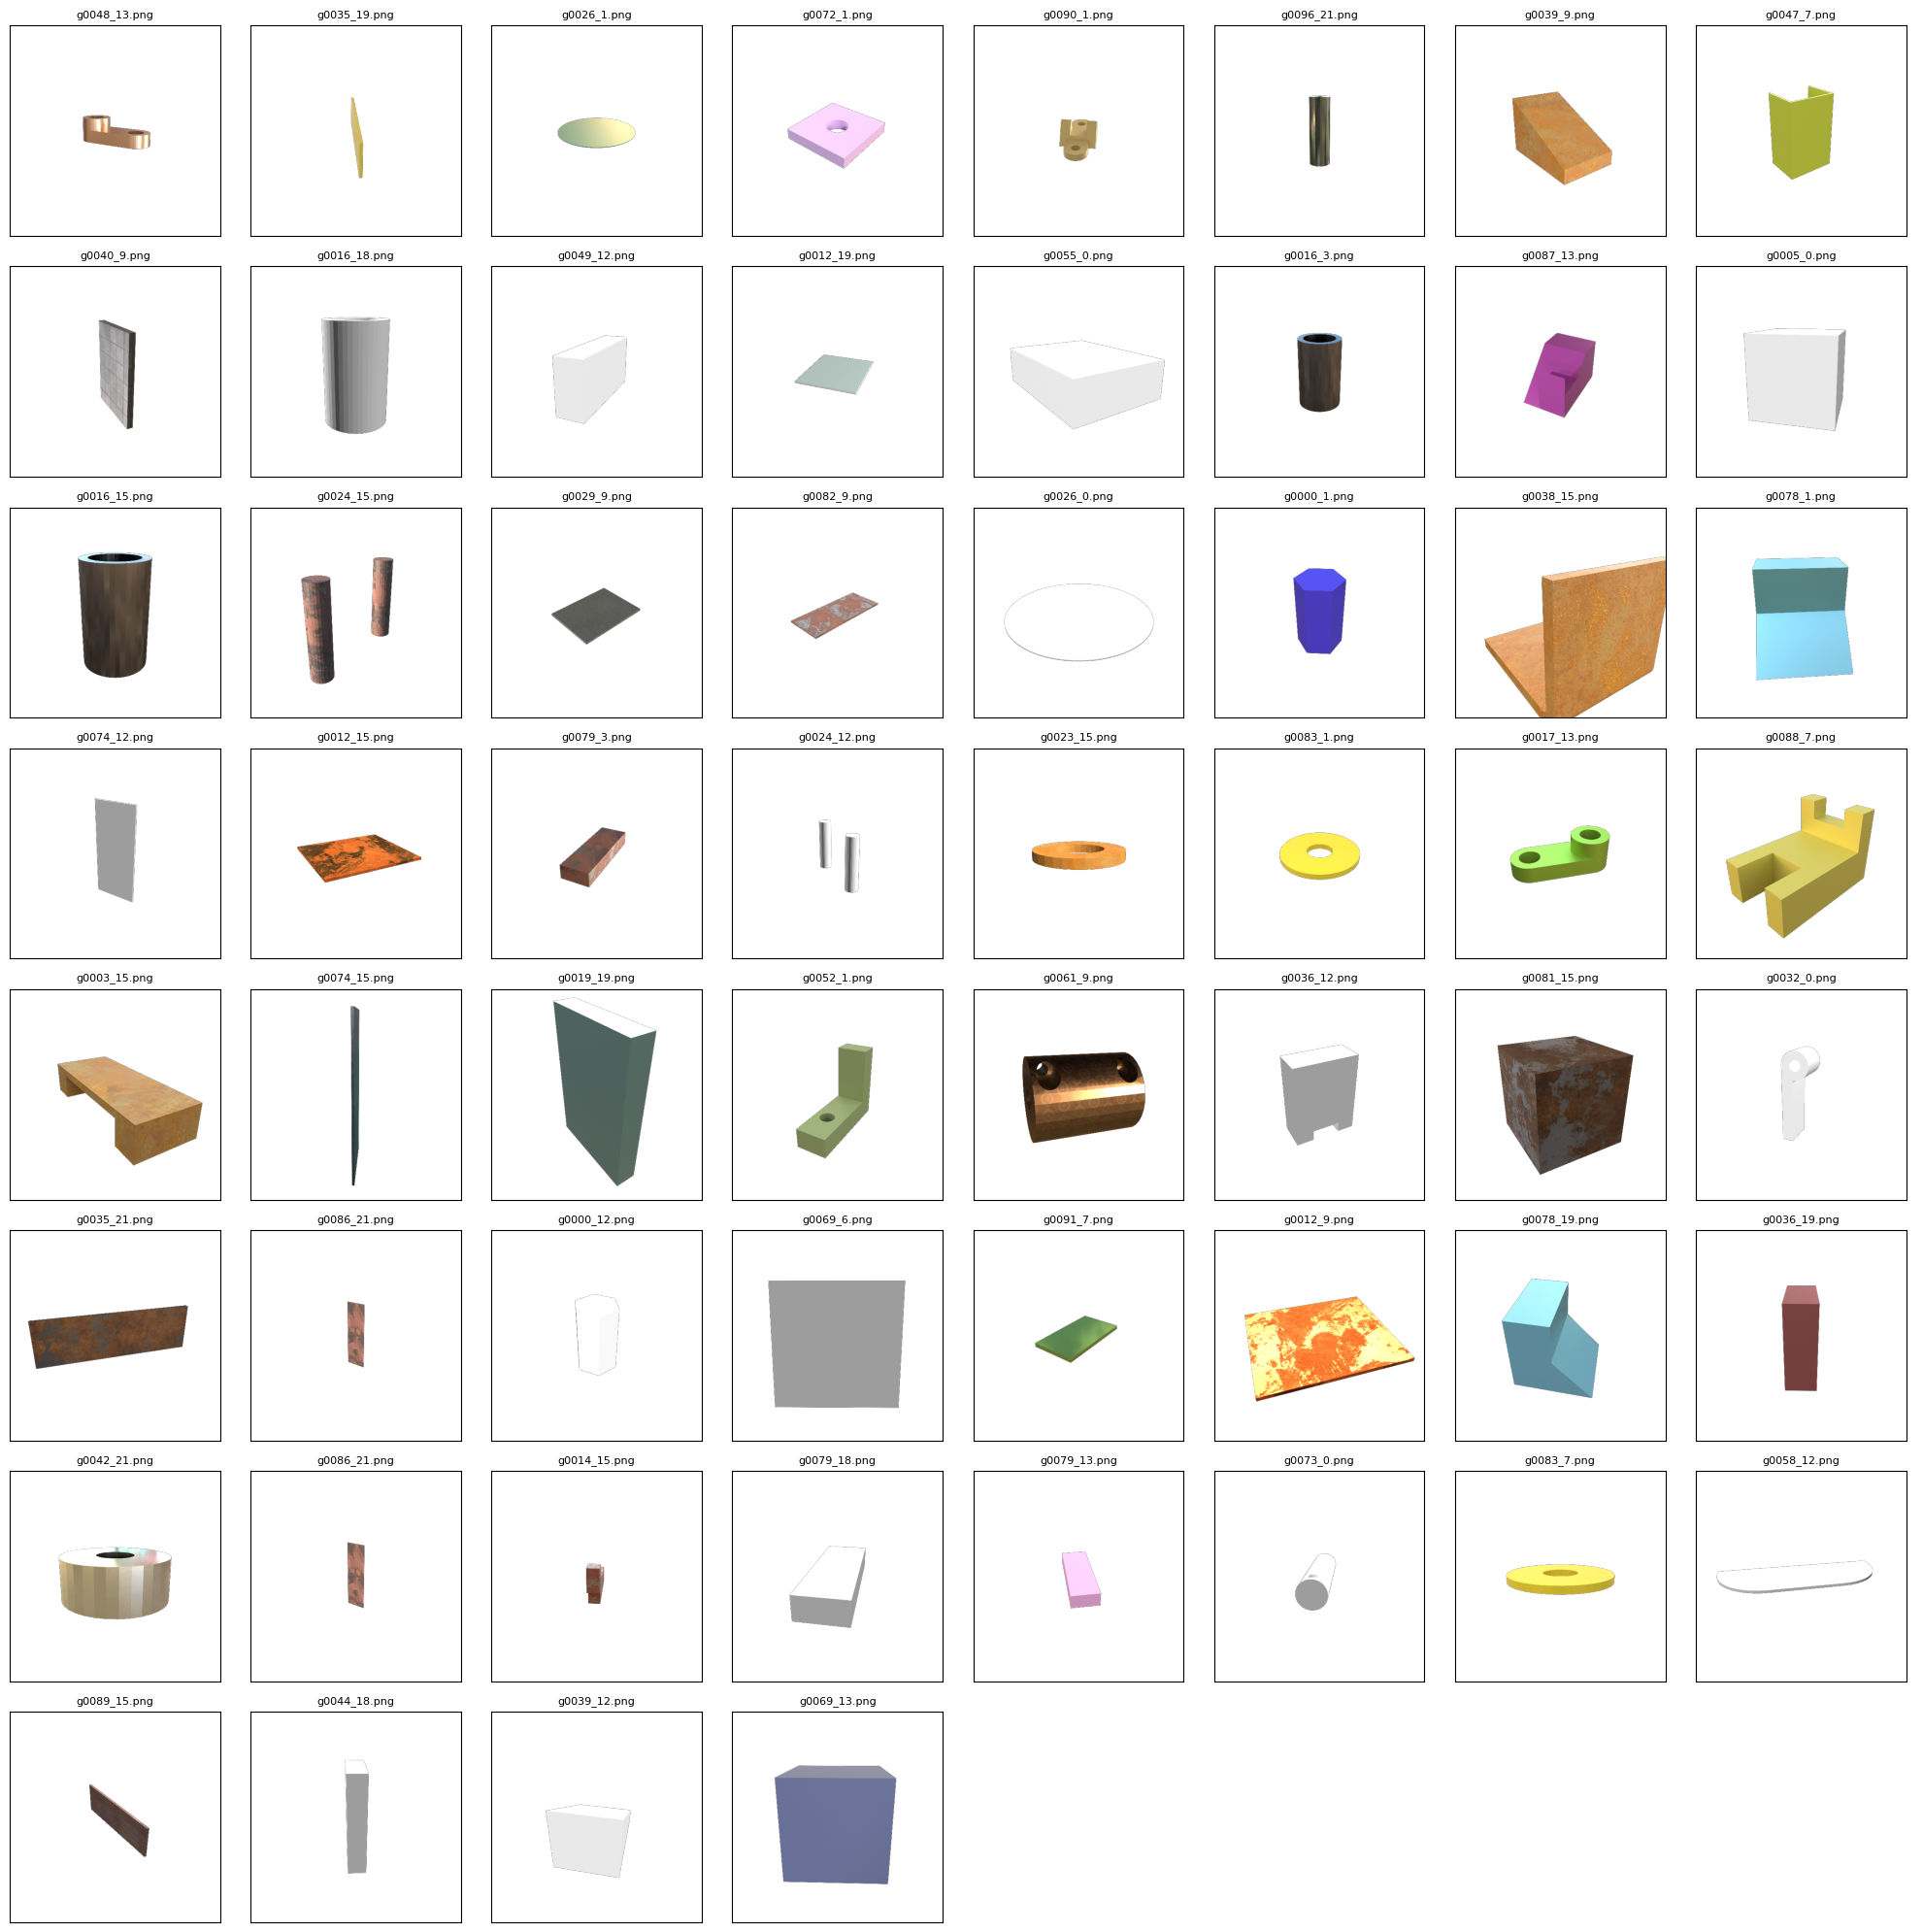

Monotonous White
Found 60 images. Preparing to display...


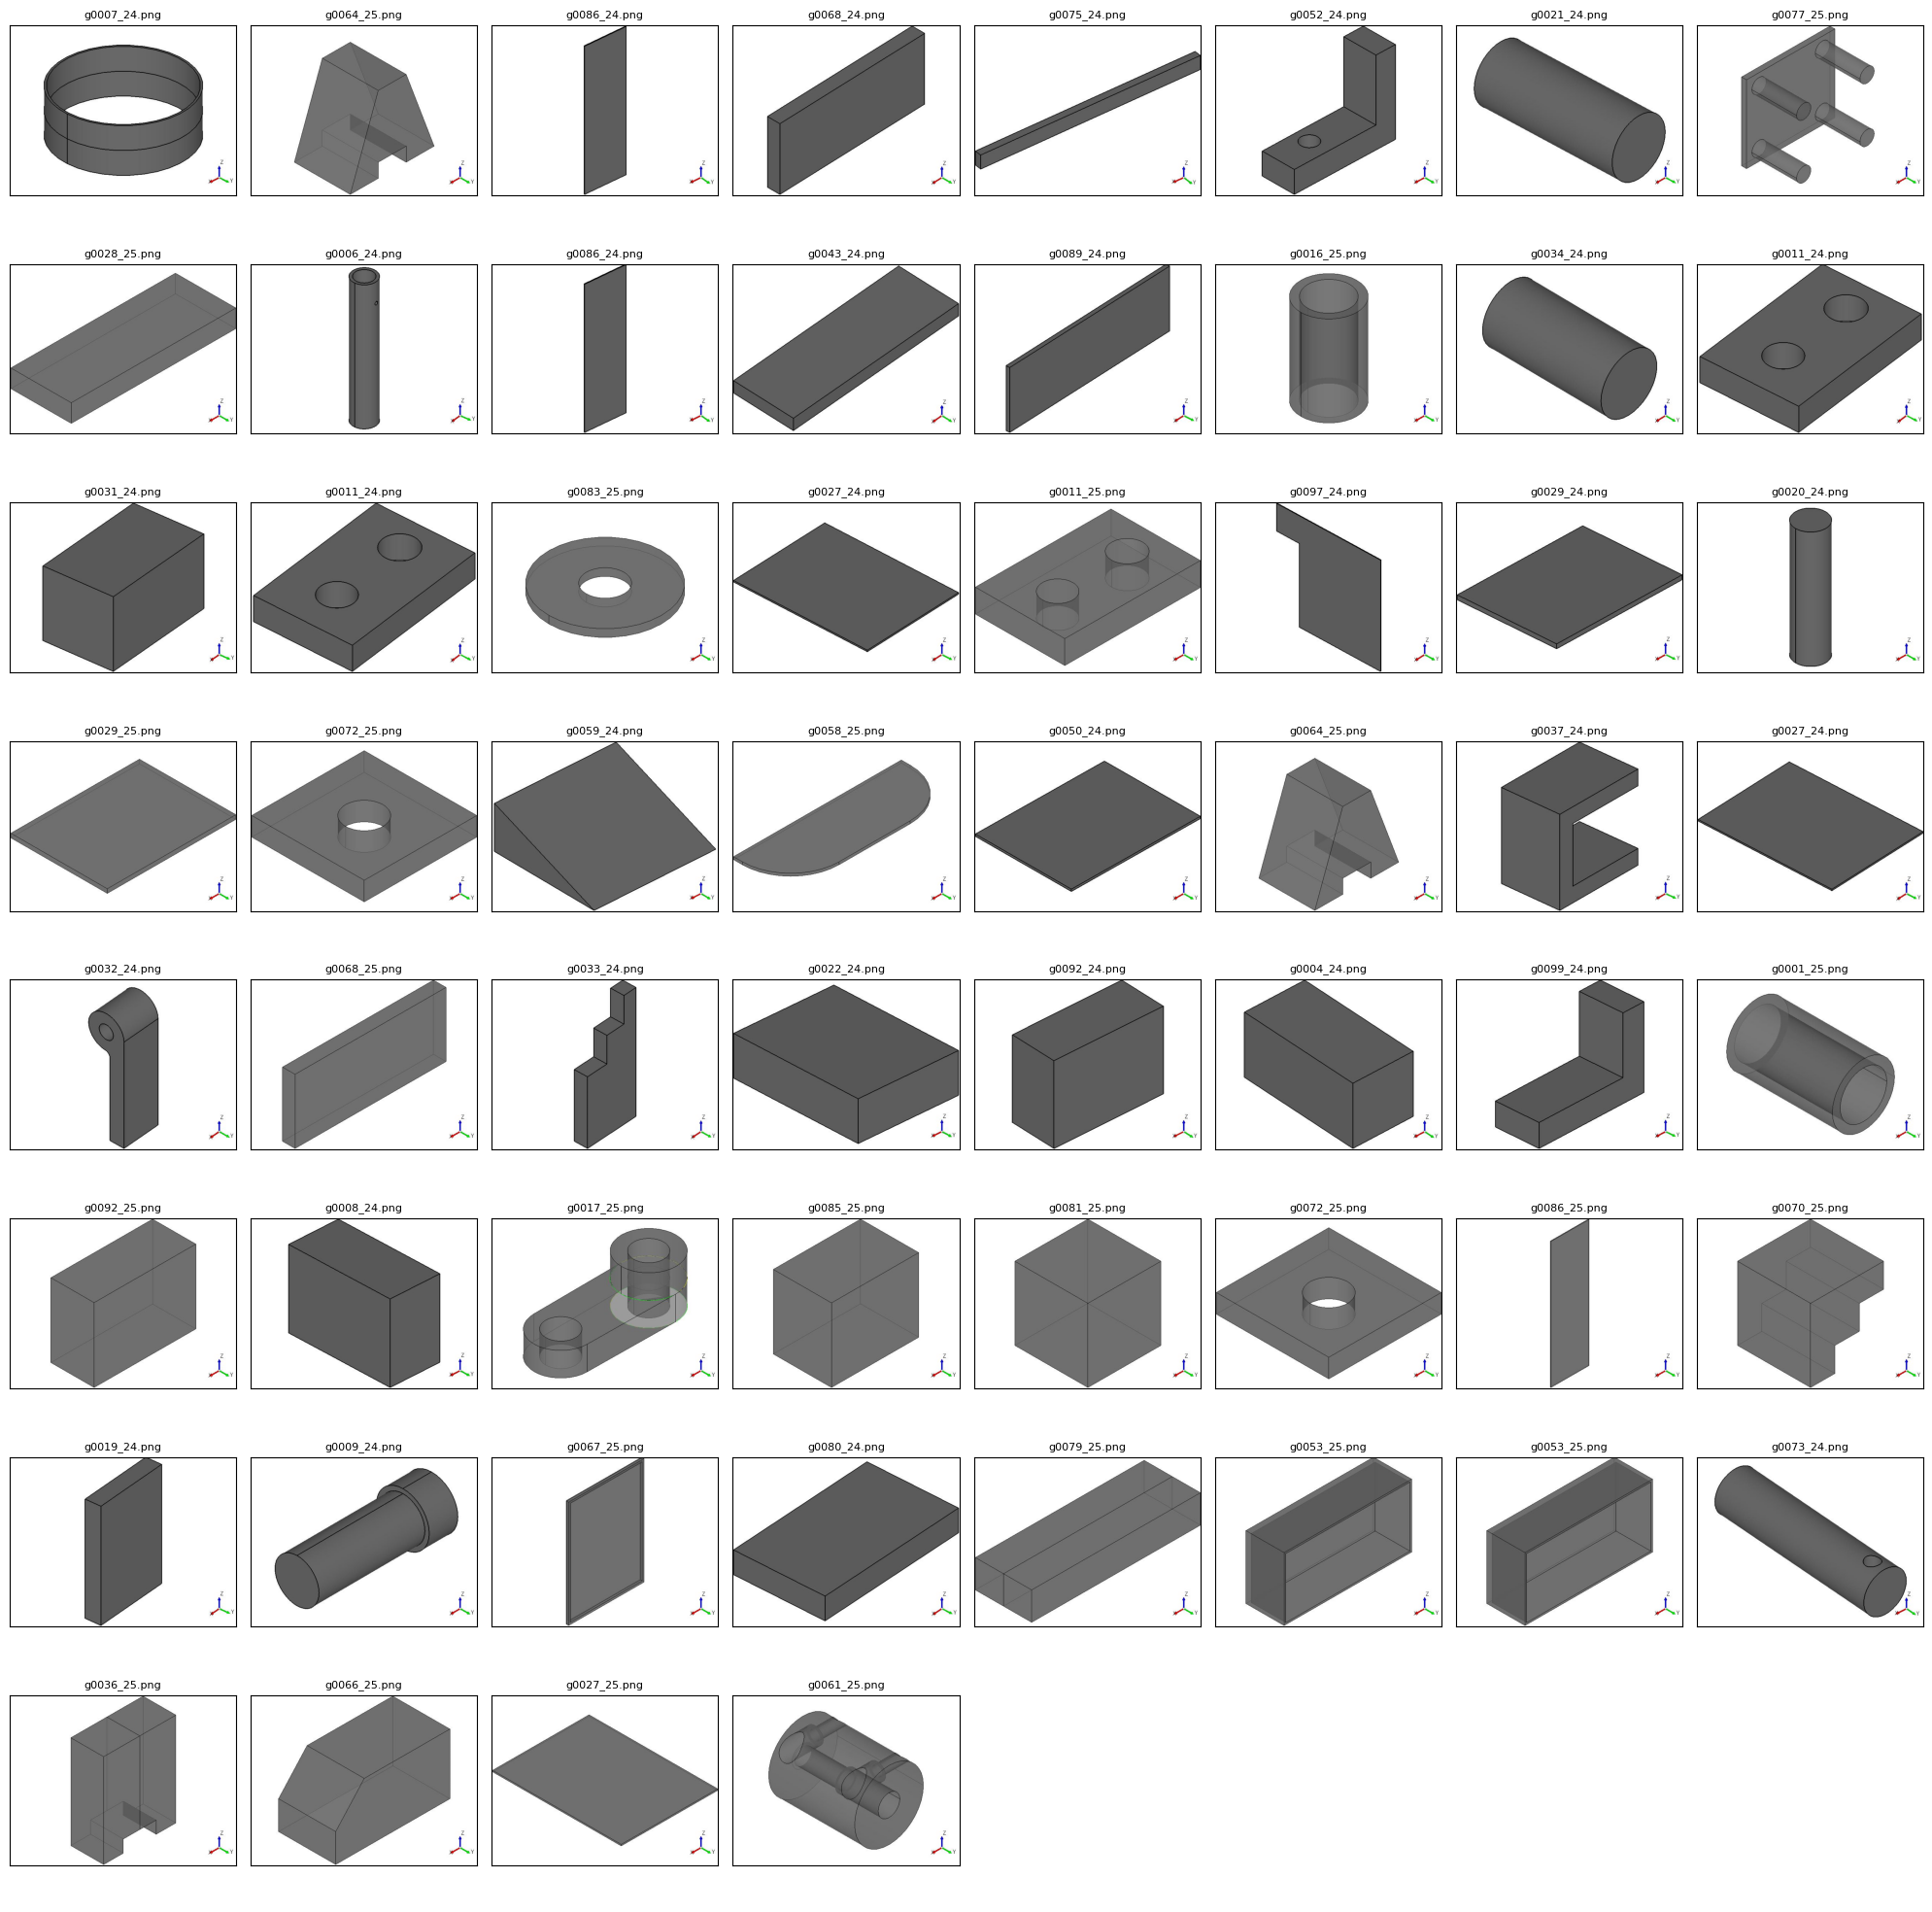

Monotonous Gray
Found 60 images. Preparing to display...


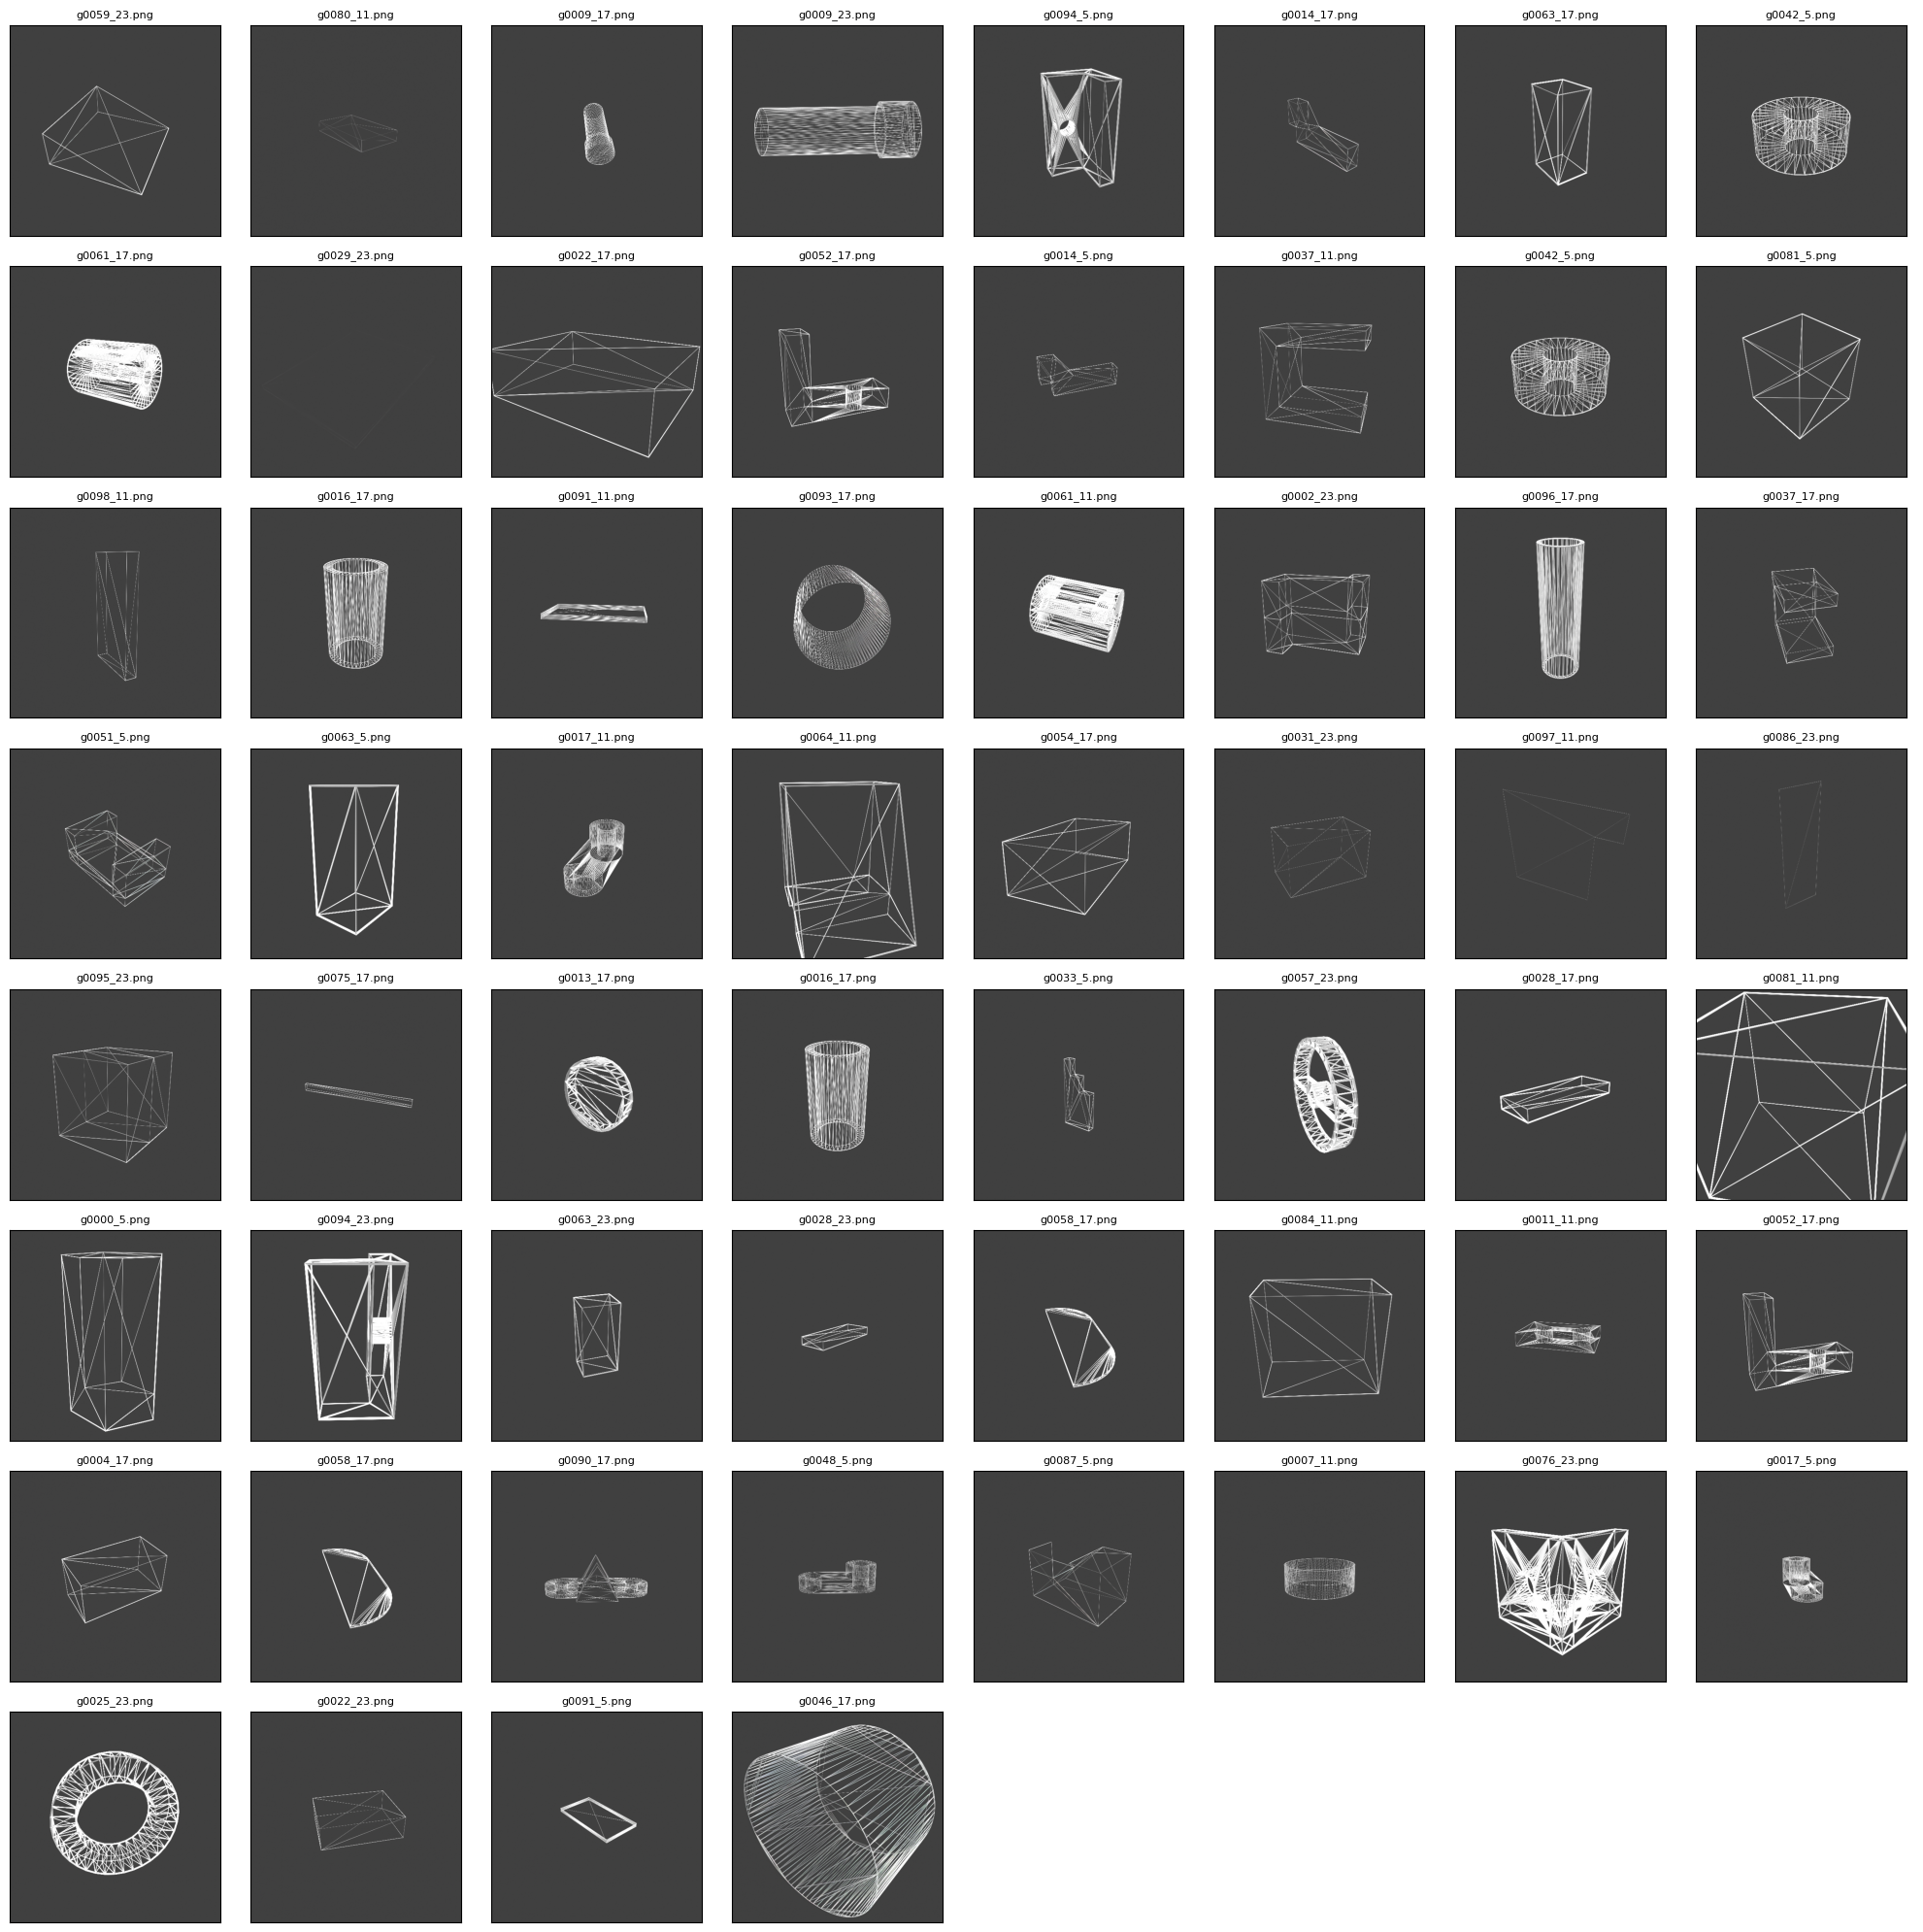

Non-Monotonous (Skybox)
Found 60 images. Preparing to display...


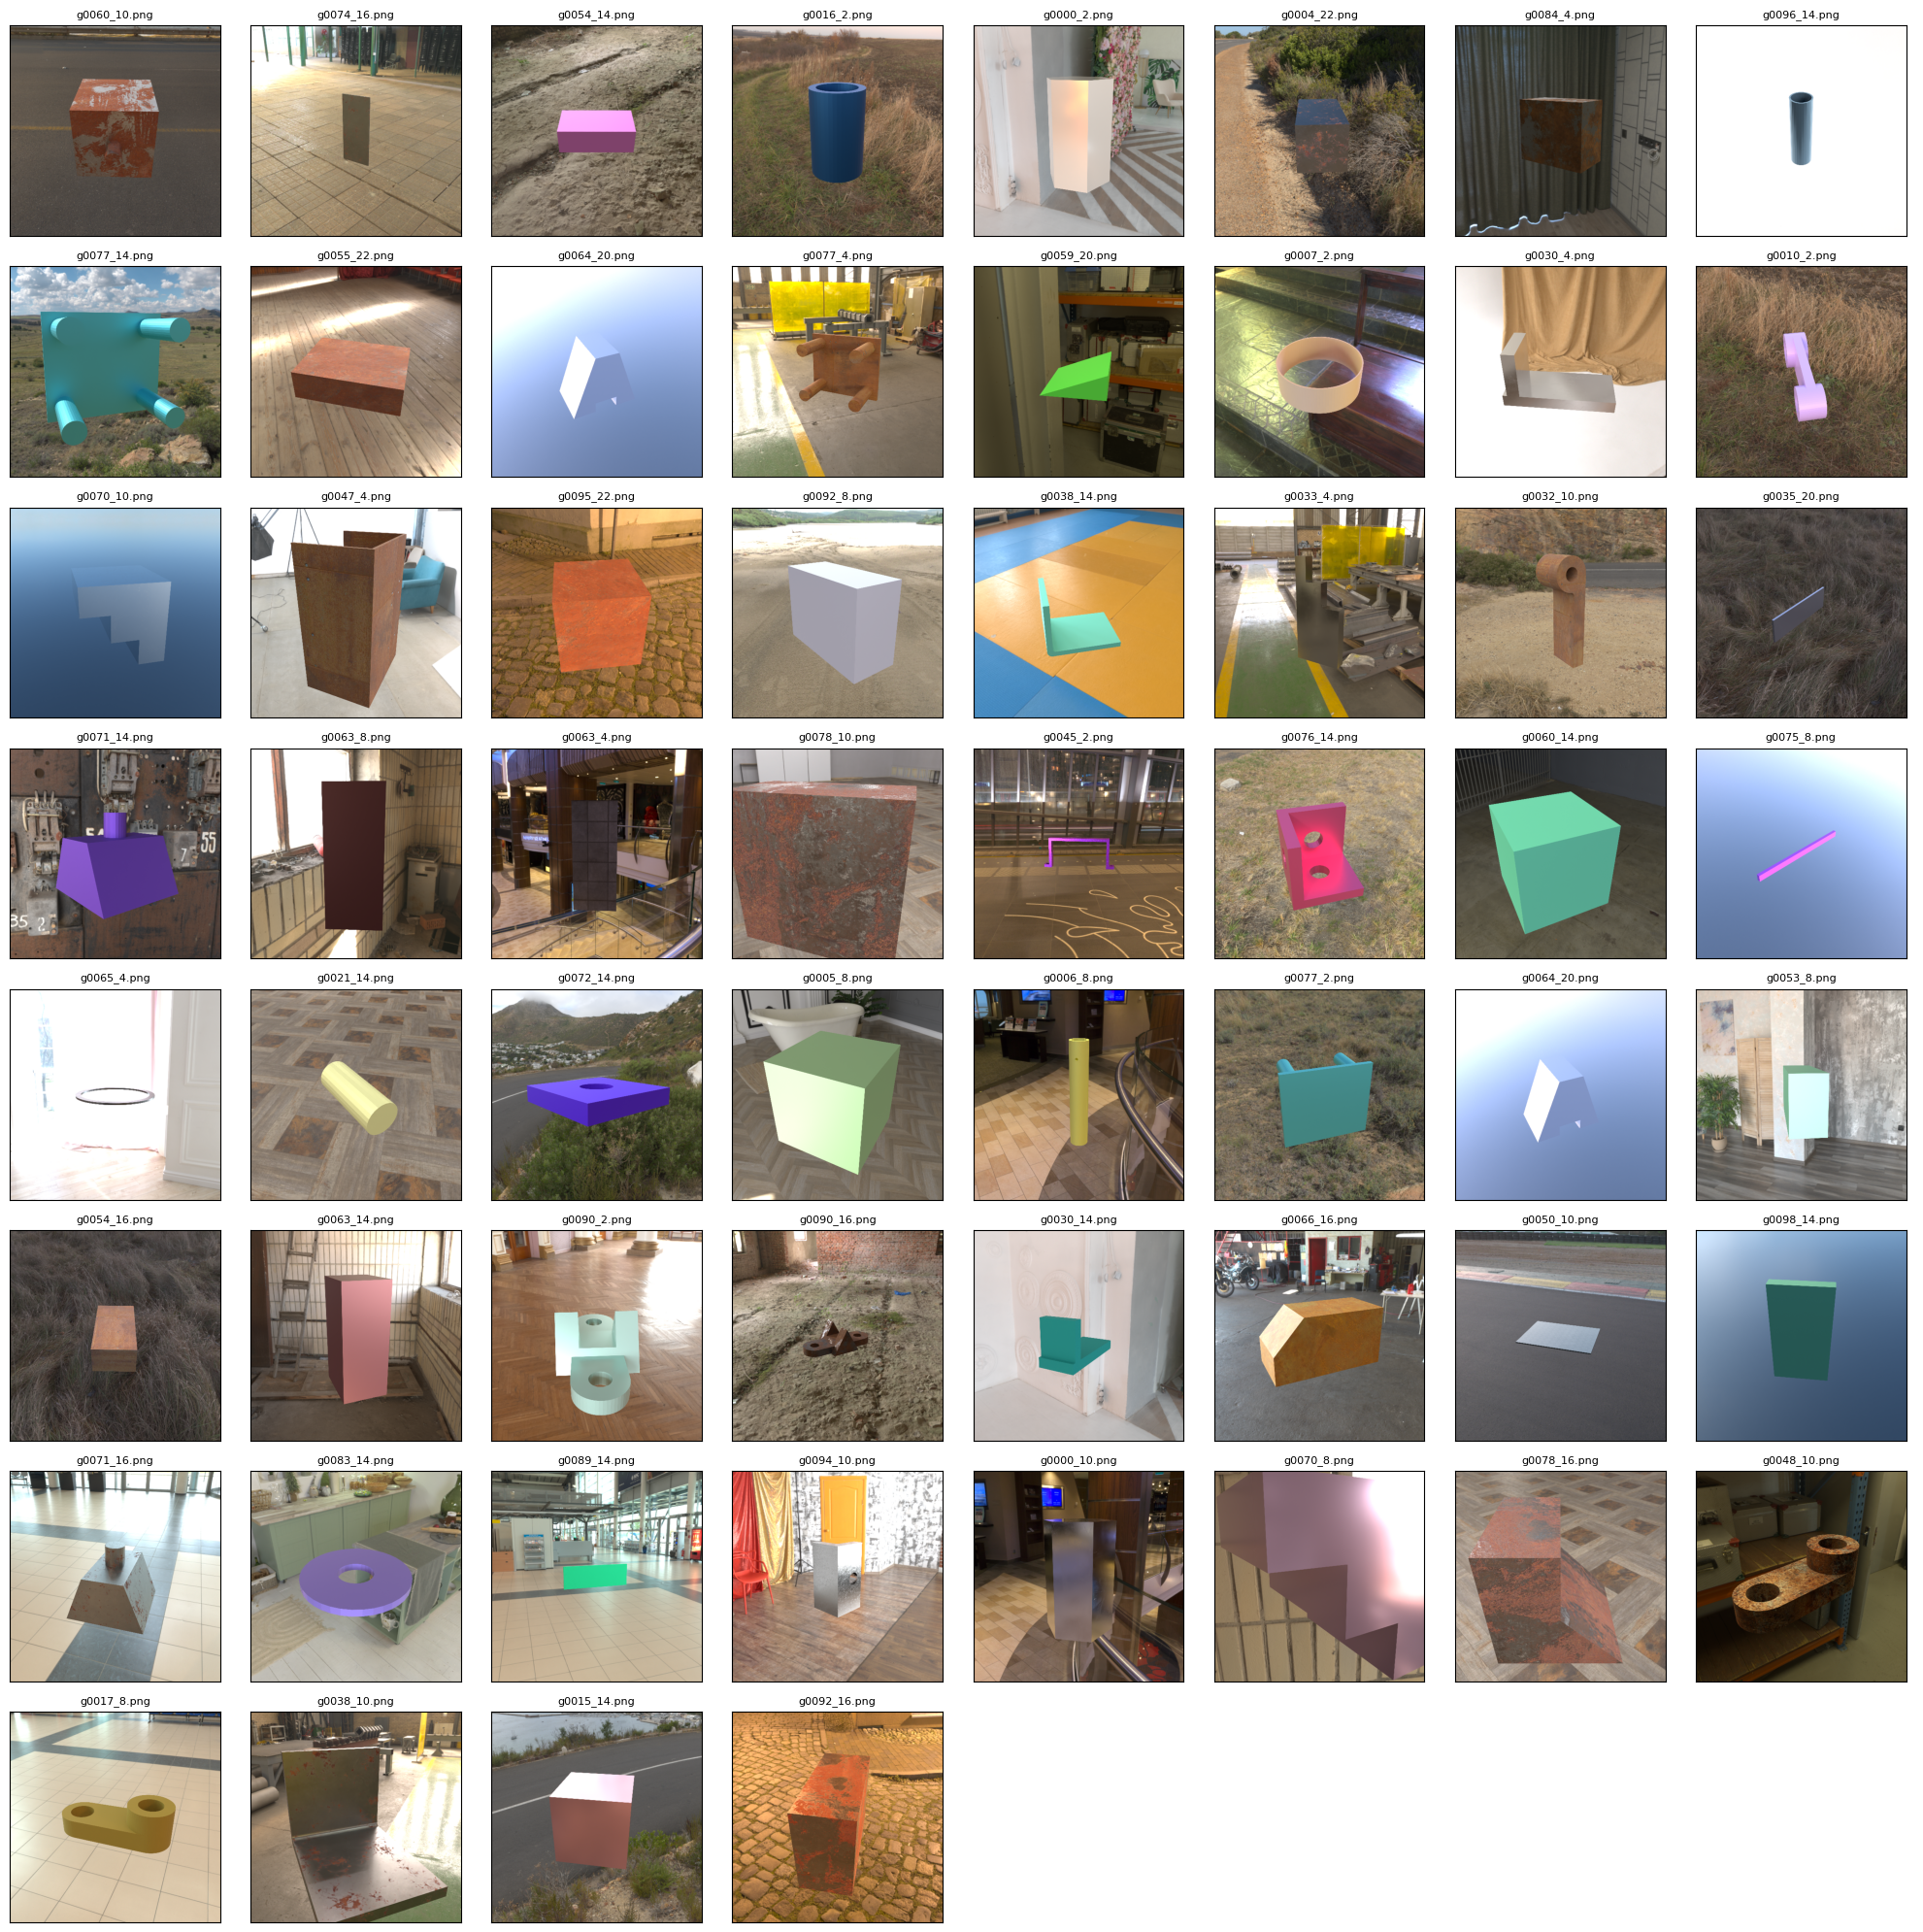

In [26]:
import os
import random
import math
from PIL import Image
import matplotlib.pyplot as plt

def show_image_grid(image_files, max_images=60):
    """
    Scans a folder for PNG images and displays them in a grid.

    Args:
        folder_path (str): The path to the folder containing the PNG files.
        max_images (int): The maximum number of images to display.
    """
    # --- 1. Find the image files ---
    image_files = random.choices(image_files, k=max_images)

    if not image_files:
        print("No PNG images found in the specified folder.")
        return

    print(f"Found {len(image_files)} images. Preparing to display...")

    # --- 2. Set up the matplotlib grid ---
    # Calculate the number of rows and columns for a square-like grid
    num_images = len(image_files)
    cols = math.ceil(math.sqrt(num_images))
    rows = math.ceil(num_images / cols)

    # Create a figure and a set of subplots
    # Adjust figsize for better viewing; you might need to tweak these values
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.5, rows * 2.5))
    
    # Flatten the axes array to make it easy to iterate over
    axes = axes.flatten()

    # --- 3. Loop through images and plot them ---
    for i, img_path in enumerate(image_files):
        try:
            # Open the image file
            with Image.open(img_path) as img:
                # Plot the image on the i-th subplot
                axes[i].imshow(img)
                # Set the title to the filename (without the full path)
                axes[i].set_title(os.path.basename(img_path), fontsize=8)
                # Turn off the axis ticks and labels
                axes[i].set_xticks([])
                axes[i].set_yticks([])
        except Exception as e:
            # If an image can't be opened, show a black square and print an error
            axes[i].text(0.5, 0.5, 'Error', ha='center', va='center')
            print(f"Could not display {os.path.basename(img_path)}: {e}")
    
    # --- 4. Clean up and display the plot ---
    # Hide any unused subplots in the grid
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    # Use a tight layout to prevent titles from overlapping
    plt.tight_layout()
    # Show the plot window
    plt.show()


if __name__ == "__main__":
    # IMPORTANT: Replace this with the actual path to your folder
    for k, v in categorys.items():
        print(k)
        show_image_grid(v)